In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import statsmodels.api as sm

### Data import

In [4]:
day_df = pd.read_csv('day.csv')

In [5]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data Understanding and Exploration

In [6]:
# Check data type
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# have a quick look at some stats numbers
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#check if null replacement would need to be performed
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Data dictionary understanding

In [9]:
# season: (1:spring, 2:summer, 3:fall, 4:winter)
# No big gaps among the seasons
day_df['season'].astype('category').value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [10]:
# year: (0: 2018, 1:2019)
# 2 years with same entries counts
day_df['yr'].astype('category').value_counts()

0    365
1    365
Name: yr, dtype: int64

In [11]:
# month ( 1 to 12)
day_df['mnth'].astype('category').value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [12]:
# weathersit ( 1 to 12)
# 		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
# No bad-weather days (weathersit = 4) appear in the observation
day_df['weathersit'].astype('category').value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [13]:
# holiday ( 0: not a holiday, 1: a holiday)
day_df['holiday'].astype('category').value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [14]:
# weekday (0: Tuesday, 1: Wednesday, 2: Thursday, 3: Friday, 4: Saturday, 5: Sunday, 6: Monday)
day_df['weekday'].astype('category').value_counts()

0    105
1    105
6    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [15]:
# workingday (0: weekend or a holiday, 1: workingday)
day_df['workingday'].astype('category').value_counts()

1    499
0    231
Name: workingday, dtype: int64

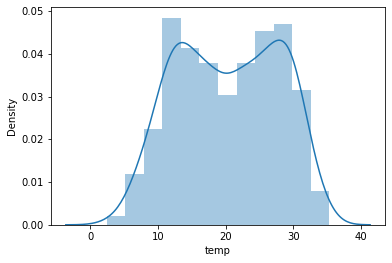

In [16]:
# temp: temperature in Celsius
sns.distplot(day_df['temp'])
plt.show()

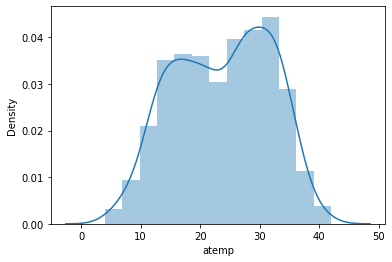

In [17]:
# atemp: feeling temperature in Celsius
sns.distplot(day_df['atemp'])
plt.show()

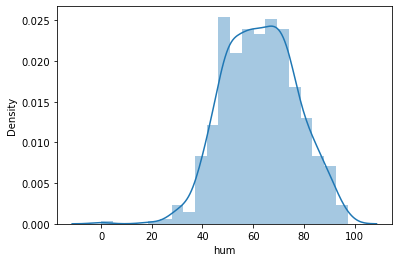

In [18]:
# hum: humidity
sns.distplot(day_df['hum'])
plt.show()

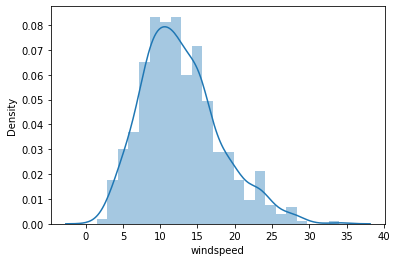

In [19]:
# windspeed: wind speed
sns.distplot(day_df['windspeed'])
plt.show()

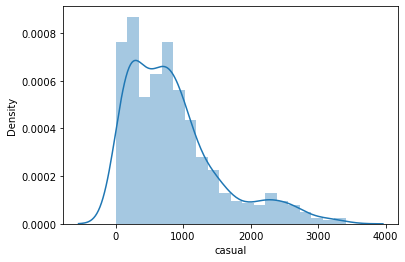

In [20]:
# casual: count of casual users
sns.distplot(day_df['casual'])
plt.show()

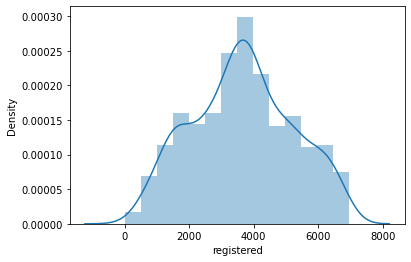

In [21]:
# registered: count of registered users
sns.distplot(day_df['registered'])
plt.show()

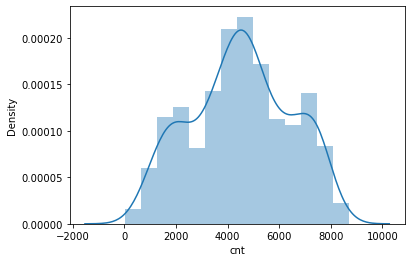

In [22]:
# cnt: count of total rental bikes including both casual and registered
sns.distplot(day_df['cnt'])
plt.show()

##### Data exploration

In [23]:
# Drop column instant because this is just a record index
day_df['instant'].astype('category').value_counts()

1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: instant, Length: 730, dtype: int64

In [24]:
day_df = day_df.drop(['instant'], axis=1)
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


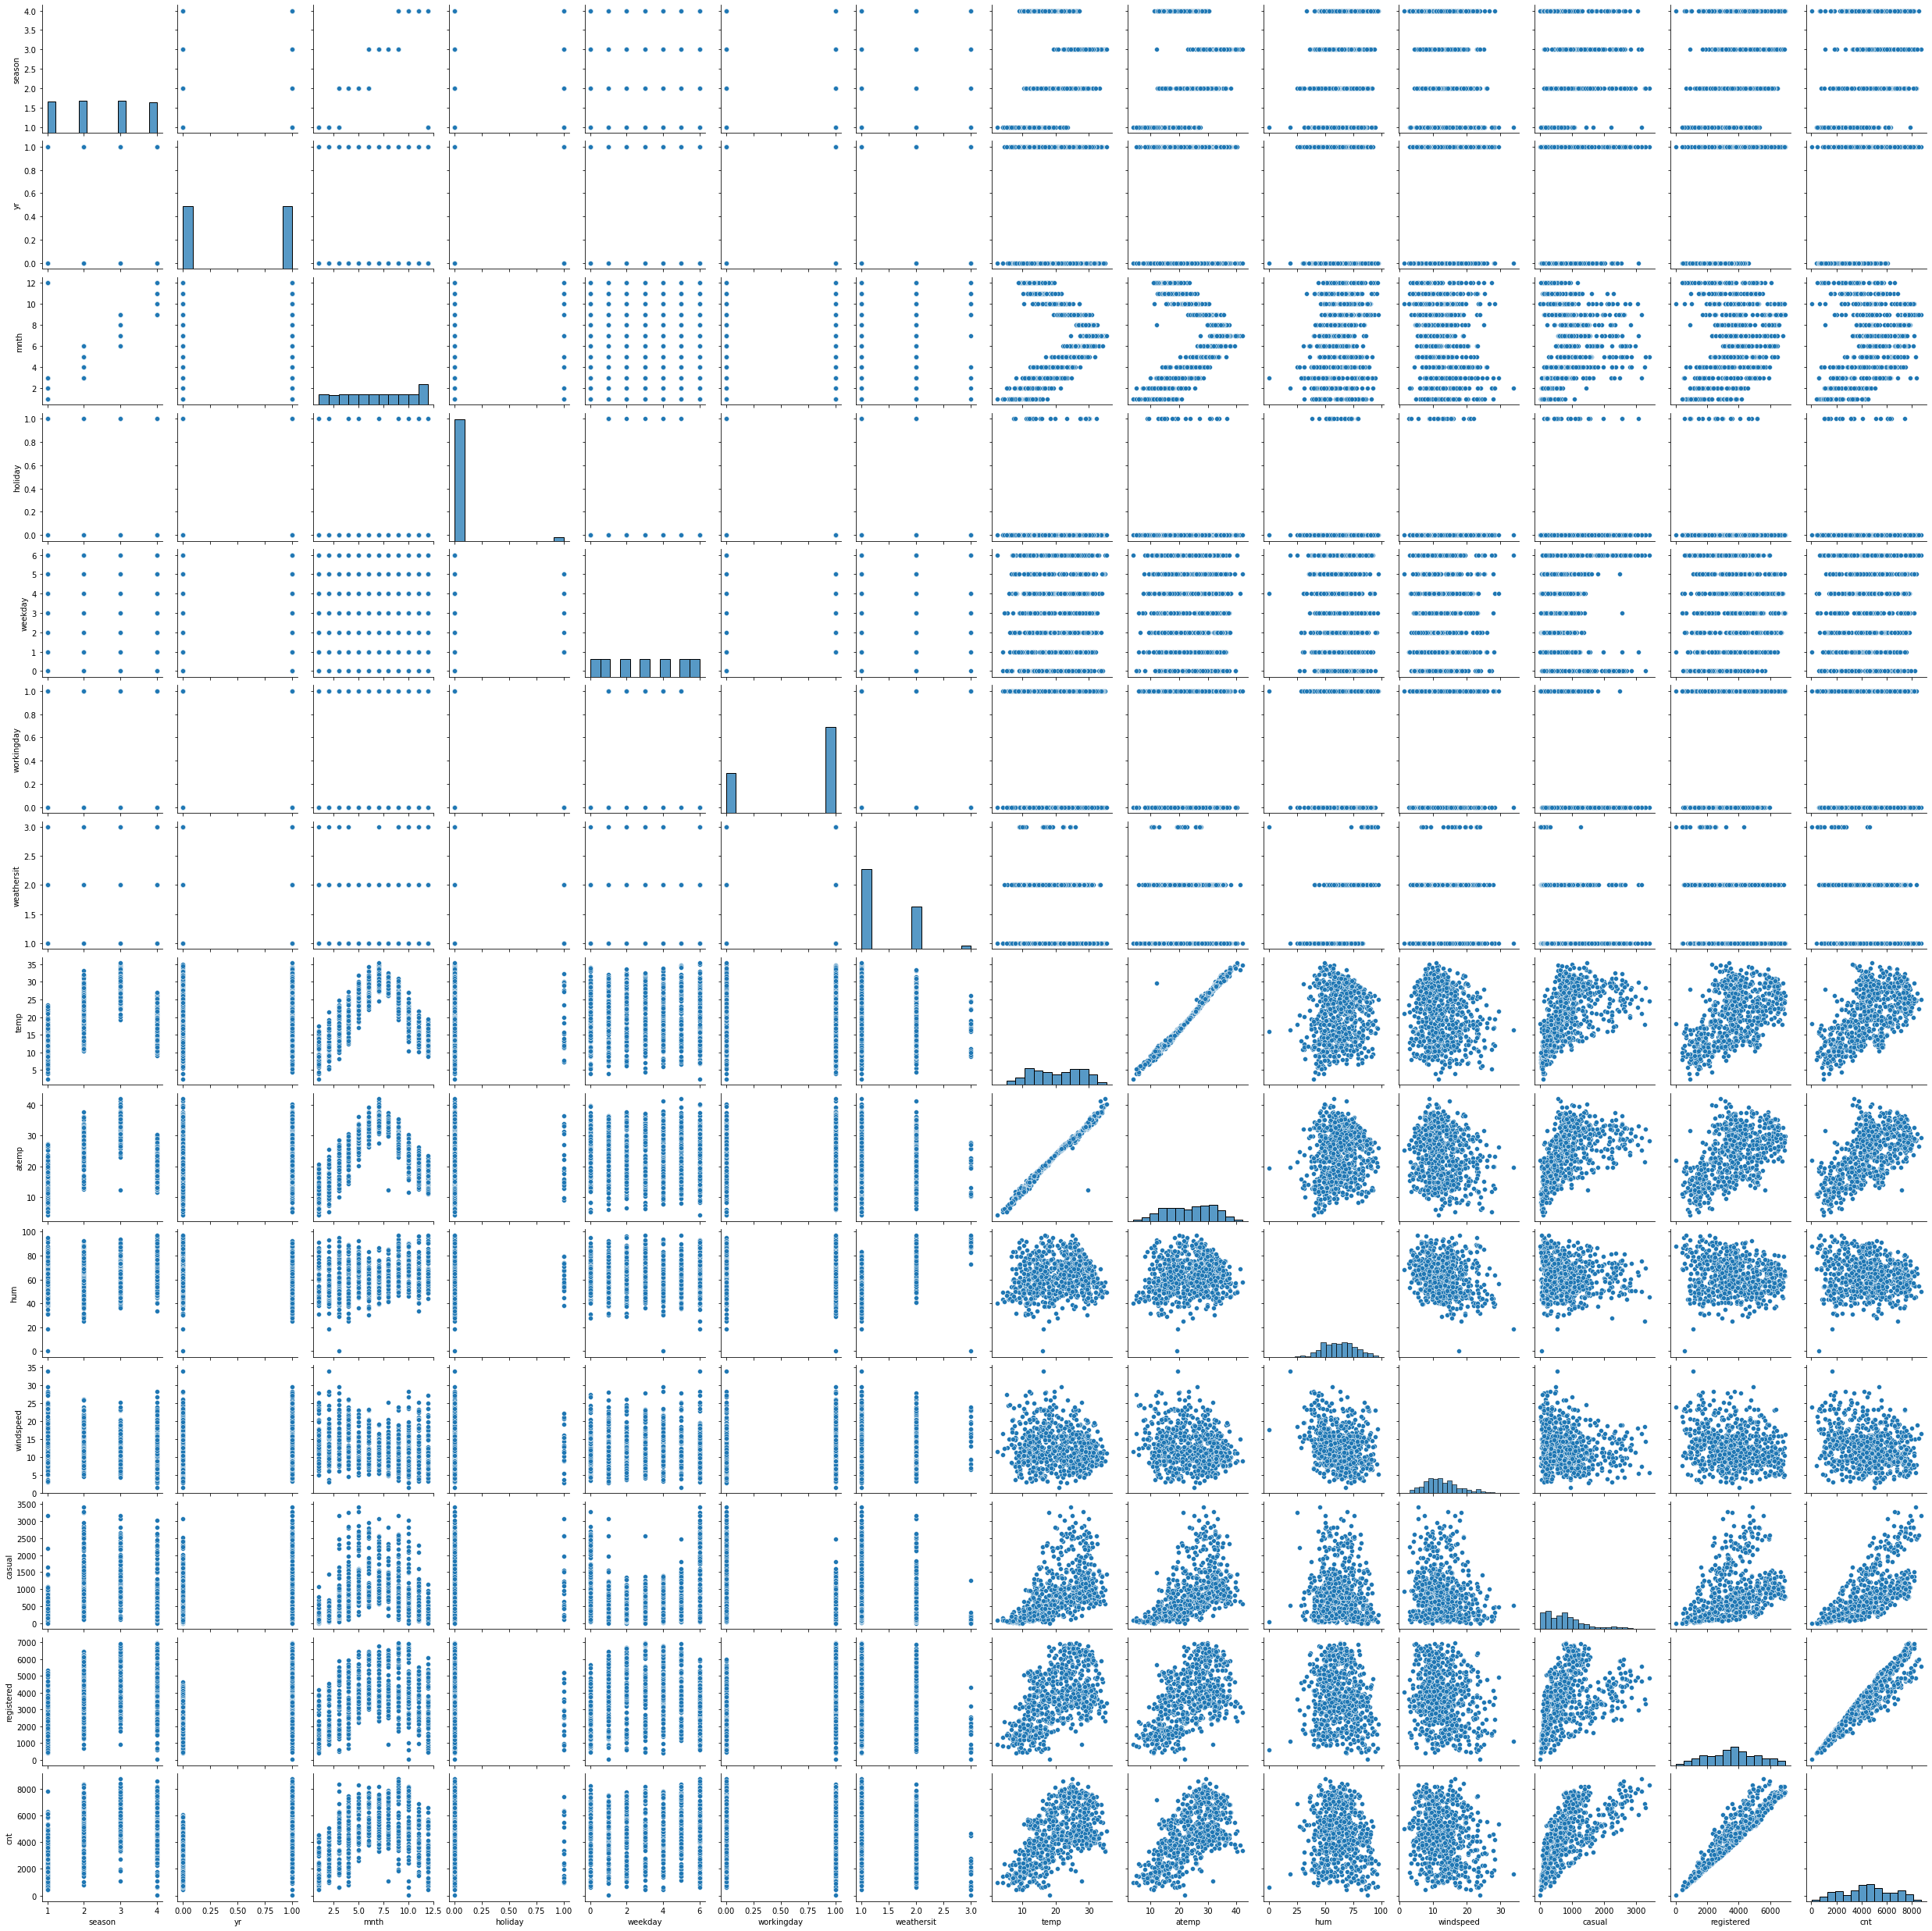

In [25]:
# Pairwise scatter plot
sns.pairplot(data=day_df)
plt.show()

Plot the correlations on a heatmap

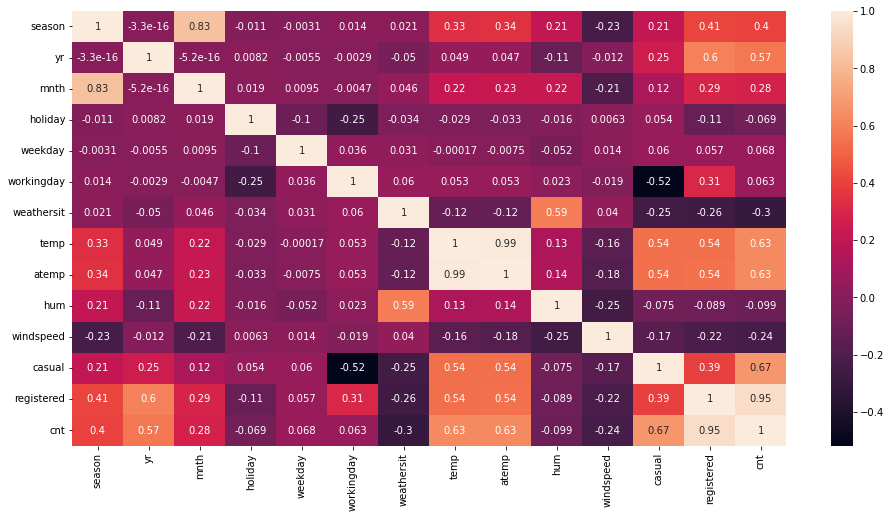

In [26]:
# Figure size
plt.figure(figsize=(16,8))

# Heatmap
sns.heatmap(day_df.corr(), annot=True)
plt.show()

Observation:
+ Cnt has positive correlation with season, year, month, temperature
+ Cnt has negative correlation with holiday, weathersit and humidity
+ Correlationship among independent variables: mnth vs season, temp vs atemp

### Data cleaning

In [27]:
# Drop column dteday because year, month, date info already reflected in other columns
day_df = day_df.drop(['dteday'], axis = 1)

In [28]:
#Drop columns casual & registered because these 2 columns would sum up into cnt and cnt is already the target
day_df = day_df.drop(['casual', 'registered'], axis = 1)

In [29]:
# No need to carry out null replacement 
day_df.isna().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

Recall that 2 independent variables temp and atemp have very high collineariy (0.99), whereas they have the same correlation value with target variable cnt (0.63), it's neccessary to remove 1 variable 

In [30]:
day_df = day_df.drop(['atemp'], axis = 1)

In the same manner, mnth vs season also have high collinearity (0.83). Since season has higher correlation vs target variable(0.4), we can drop the other column of month 

In [31]:
day_df = day_df.drop(['mnth'], axis = 1)

### Data preparation

Need to convert numerical values of categorical column into meaningful strings 

In [32]:
#season (1:spring, 2:summer, 3:fall, 4:winter)
day_df['season'] = day_df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [33]:
day_df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [34]:
#yr (0: 2018, 1:2019)
day_df['yr'] = day_df['yr'].map({0:'2018', 1:'2019'})

In [35]:
day_df['yr'].value_counts()

2018    365
2019    365
Name: yr, dtype: int64

In [36]:
#mnth : month ( 1 to 12)
#day_df['mnth'] = day_df['mnth'].map({1:'Jan', 2:'Feb', 3: 'Mar', 4:'Apr', 5:'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [37]:
#weekday (0: Tuesday, 1: Wednesday, 2: Thursday, 3: Friday, 4: Saturday, 5: Sunday, 6: Monday)
day_df['weekday'] = day_df['weekday'].map({0:'Tuesday', 1:'Wednesday', 2:'Thursday', 3: 'Friday', 4: 'Saturday', 5: 'Sunday', 6: 'Monday'})

In [38]:
#weathersit (1:clear, 2:mist_cloud, 3:light_rain_snow, 4:heavy_rain_ice)
day_df['weathersit'] = day_df['weathersit'].map({1:'clear', 2:'mist_cloud', 3:'light_rain_snow', 4:'heavy_rain_ice'})

In [39]:
day_df['weathersit'].value_counts()

clear              463
mist_cloud         246
light_rain_snow     21
Name: weathersit, dtype: int64

In [40]:
categorical_cols = ['season', 'yr', 'weekday', 'weathersit']

In [41]:
#create a dataframe that contains only categorical columns, in order to create dummies columns
df_day_categorical = day_df[categorical_cols]

In [42]:
df_day_categorical.head()

,season,yr,weekday,weathersit
0,spring,2018,Monday,mist_cloud
1,spring,2018,Tuesday,mist_cloud
2,spring,2018,Wednesday,clear
3,spring,2018,Thursday,clear
4,spring,2018,Friday,clear


Now needs to convert nominal categorical variables into dummies columns

In [43]:
day_dummies = pd.get_dummies(df_day_categorical, drop_first=True)

In [44]:
day_dummies.head()

,season_spring,season_summer,season_winter,yr_2019,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light_rain_snow,weathersit_mist_cloud
0,1,0,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [45]:
#Drop categorical columns in original DF
day_df = day_df.drop(categorical_cols, axis = 1)

In [46]:
#concatenate the dataframe with the DF with dummies variables
day_df = pd.concat([day_df, day_dummies], axis=1)

In [47]:
day_df.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light_rain_snow,weathersit_mist_cloud
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,1,0,0,0,0,0,0,1
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,0,0,1,0,0,1
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,0,1,0,0
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0,0,0,0


### Model building and evaluation

In [48]:
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(day_df, train_size=0.7, test_size=0.3, random_state=102)

We need to normalize some numeric columns before the model training. It's best practice to perform normalization on training dataset first, instead of the whole dataset

In [49]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

In [50]:
scaled_list = ['temp', 'hum', 'windspeed']
# Scale these variables using 'fit_transform'
df_train[scaled_list] = scaler.fit_transform(df_train[scaled_list])

In [51]:
df_train.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light_rain_snow,weathersit_mist_cloud
445,0,1,0.300316,1.425340,-0.924424,6871,0,1,0,1,0,1,0,0,0,0,0,0
399,0,0,-1.264108,1.059262,-0.867024,2832,1,0,0,1,1,0,0,0,0,0,0,1
709,0,1,-0.783096,-0.236759,1.439312,5501,0,0,1,1,0,0,0,1,0,0,0,1
502,0,1,0.354262,-0.756355,-0.669410,7639,0,1,0,1,0,0,1,0,0,0,0,0
512,1,0,1.154454,0.327113,0.121314,6043,0,1,0,1,0,0,0,0,0,1,0,0


In [52]:
# Split the train dataset into X_train and y_train

y_train = df_train.pop('cnt')
X_train = df_train

#### Build the model with all features

In [53]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [54]:
# Print the coefficients and intercept
print(lr.coef_)
print(lr.intercept_)

[ -374.98423455   180.32500094   909.02225122  -183.23270927
  -238.2845654   -890.1640043    234.25751368   655.25849275
  2074.50492995   317.59678721   136.74018742   129.28712368
    54.58384874  -122.9375536    -27.67914054 -1570.1372398
  -383.94013592]
3493.615978809248


### Model building and evaluation

#### Model building using RFE

In [55]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 16 features
rfe = RFE(estimator=LinearRegression(), n_features_to_select=16)

# Fit with 16 features
rfe.fit(X_train, y_train)

# Print the boolean results
print(rfe.support_)           
print(rfe.ranking_)  

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1]


In [56]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe
rfe_col = X_train.columns[rfe.support_]

# Subsetting training data for 16 selected columns
X_train_rfe = X_train[rfe_col]

# Add a constant to the model
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weathersit_light_rain_snow,weathersit_mist_cloud
445,1.0,0,1,0.300316,1.425340,-0.924424,0,1,0,1,0,1,0,0,0,0,0
399,1.0,0,0,-1.264108,1.059262,-0.867024,1,0,0,1,1,0,0,0,0,0,1
709,1.0,0,1,-0.783096,-0.236759,1.439312,0,0,1,1,0,0,0,1,0,0,1
502,1.0,0,1,0.354262,-0.756355,-0.669410,0,1,0,1,0,0,1,0,0,0,0
512,1.0,1,0,1.154454,0.327113,0.121314,0,1,0,1,0,0,0,0,0,0,0


In [57]:
# Fitting the model
lm = sm.OLS(y_train, X_train_rfe).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     163.0
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          3.37e-180
Time:                        10:18:17   Log-Likelihood:                -4133.7
No. Observations:                 510   AIC:                             8299.
Df Residuals:                     494   BIC:                             8367.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Drop columns with P-value > 0.05

In [58]:
removed_cols = ['weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday']

In [59]:
X_train_rfe = X_train_rfe.drop(removed_cols, axis=1)

Check the VIF values of the feature variables. 

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
# Create a DF that would contain the feature variables name and their corresponding VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,holiday,inf
2,workingday,inf
10,weekday_Monday,inf
11,weekday_Tuesday,inf
6,season_spring,4.52
3,temp,3.54
8,season_winter,2.92
4,hum,2.02
7,season_summer,1.93
13,weathersit_mist_cloud,1.61


Build a different model with 10 features using RFE

In [62]:
# RFE with 9 features
rfe1 = RFE(estimator=LinearRegression(), n_features_to_select=9)

# Fit with 9 features
rfe1.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=9)

In [63]:
# Subset the features selected by rfe1
ref_col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 10 selected columns
X_train_rfe1 = X_train[ref_col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 9 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     247.7
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          5.96e-178
Time:                        10:21:10   Log-Likelihood:                -4155.6
No. Observations:                 510   AIC:                             8331.
Df Residuals:                     500   BIC:                             8374.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [64]:
# Create a DF that would contain the feature variables name and their corresponding VIFs for RFE1
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.73
4,season_spring,2.62
3,temp,2.51
2,workingday,1.95
7,weekday_Monday,1.81
5,season_winter,1.68
1,holiday,1.21
8,weathersit_light_rain_snow,1.06
9,weathersit_mist_cloud,1.04
6,yr_2019,1.02


Drop column yr_2018 that has p-value > 0.05

In [65]:
X_train_rfe1.drop('holiday', axis = 1, inplace = True)

In [66]:
# Refitting with 8 variables

X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Fitting the model with 8 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     278.4
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          6.22e-179
Time:                        10:27:04   Log-Likelihood:                -4156.2
No. Observations:                 510   AIC:                             8330.
Df Residuals:                     501   BIC:                             8369.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [67]:
# Create a DF that would contain the feature variables name and their corresponding VIFs for RFE1
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,9.45
3,season_spring,2.62
2,temp,2.51
4,season_winter,1.68
1,workingday,1.64
6,weekday_Monday,1.62
7,weathersit_light_rain_snow,1.06
8,weathersit_mist_cloud,1.04
5,yr_2019,1.02


The value of Adjusted R-squared slightly drops from 0.827 to 0.813 when evaluating the second model with 8 features. So we'll proceed with this model

#### Residual Analysis

In [69]:
y_train_cnt = lm1.predict(X_train_rfe1)

Text(0.5, 0, 'Errors')

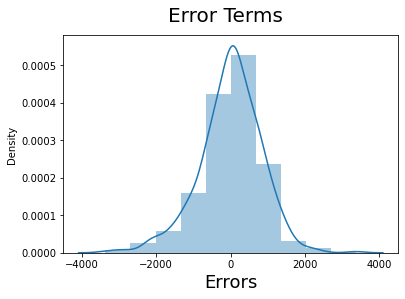

In [70]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 10)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)

The error terms are normally distributed

#### Prediction

We would also need to scale the test set

In [71]:
df_test[scaled_list] = scaler.transform(df_test[scaled_list])

In [72]:
# Split the 'df_test' set into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [74]:
ref_col1

Index(['holiday', 'workingday', 'temp', 'season_spring', 'season_winter',
       'yr_2019', 'weekday_Monday', 'weathersit_light_rain_snow',
       'weathersit_mist_cloud'],
      dtype='object')

In [75]:
# create a new dataframe 'X_test_rfe1'
X_test_rfe1 = X_test[ref_col1]

In [76]:
X_test_rfe1.head()

,holiday,workingday,temp,season_spring,season_winter,yr_2019,weekday_Monday,weathersit_light_rain_snow,weathersit_mist_cloud
164,0,1,0.570044,0,0,0,0,0,0
532,0,0,0.507106,0,0,1,0,0,0
349,0,1,-0.666212,0,1,0,0,0,1
632,0,1,0.277837,0,1,1,0,0,0
326,0,1,-0.311072,0,1,0,0,0,1


In [79]:
#we also need to remove column holiday as manually done in training step
X_test_rfe1.drop('holiday', axis = 1, inplace = True)

In [80]:
# Add a constant to the test set created
X_test_rfe1 = sm.add_constant(X_test_rfe1)
X_test_rfe1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 164 to 316
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   const                       219 non-null    float64
 1   workingday                  219 non-null    int64  
 2   temp                        219 non-null    float64
 3   season_spring               219 non-null    uint8  
 4   season_winter               219 non-null    uint8  
 5   yr_2019                     219 non-null    uint8  
 6   weekday_Monday              219 non-null    uint8  
 7   weathersit_light_rain_snow  219 non-null    uint8  
 8   weathersit_mist_cloud       219 non-null    uint8  
dtypes: float64(2), int64(1), uint8(6)
memory usage: 8.1 KB


In [81]:
# Making predictions
y_pred = lm1.predict(X_test_rfe1)

Text(0, 0.5, 'y_pred')

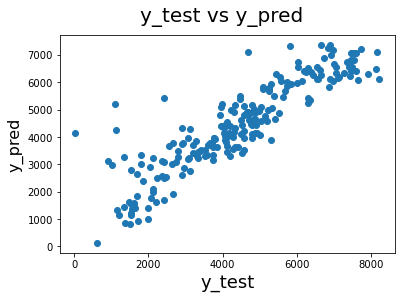

In [82]:
# Plotting y_test and y_pred 

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16) 

#### Model Evaluation

In [83]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7980765855179082

Correlations between the final predictor variables

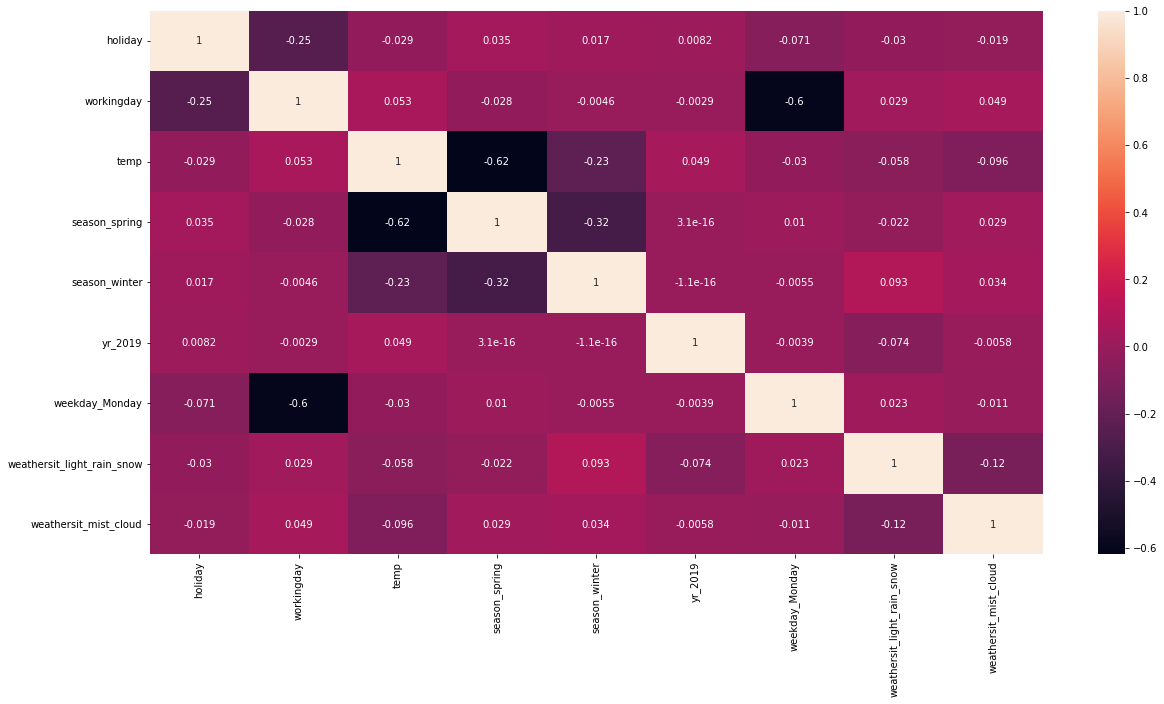

In [84]:
# Figure size
plt.figure(figsize=(20,10))

# Heatmap
sns.heatmap(day_df[ref_col1].corr(),annot=True)
plt.show()

In [85]:
day_df.corr()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light_rain_snow,weathersit_mist_cloud
holiday,1.000000,-0.252948,-0.028764,-0.015662,0.006257,-0.068764,3.464187e-02,-2.440810e-02,1.678505e-02,8.195345e-03,-0.070541,-2.325423e-02,-2.325423e-02,-4.670117e-02,-0.070541,0.279764,-0.029619,-0.018668
workingday,-0.252948,1.000000,0.053470,0.023202,-0.018666,0.062542,-2.761520e-02,1.509123e-02,-4.623058e-03,-2.945396e-03,-0.602419,2.604690e-01,2.604690e-01,2.688958e-01,-0.602419,0.152976,0.028990,0.048877
temp,-0.028764,0.053470,1.000000,0.128565,-0.158186,0.627044,-6.194080e-01,1.548756e-01,-2.255900e-01,4.878919e-02,-0.030363,1.949216e-02,-5.003258e-06,1.935952e-02,-0.026802,-0.004799,-0.058461,-0.096297
hum,-0.015662,0.023202,0.128565,1.000000,-0.248506,-0.098543,-1.848840e-01,-2.870035e-03,1.639076e-01,-1.125471e-01,-0.023310,-5.200348e-02,-3.980893e-02,4.061570e-02,0.000020,0.028591,0.267592,0.490628
windspeed,0.006257,-0.018666,-0.158186,-0.248506,1.000000,-0.235132,1.788801e-01,9.742067e-02,-1.356120e-01,-1.162435e-02,0.032187,5.792278e-03,-2.163260e-02,6.961095e-03,-0.010429,0.000999,0.117332,-0.037177
cnt,-0.068764,0.062542,0.627044,-0.098543,-0.235132,1.000000,-5.617018e-01,1.453245e-01,6.461909e-02,5.697285e-01,0.009012,3.355106e-02,3.840273e-02,5.596898e-04,-0.059146,-0.035991,-0.240602,-0.170686
season_spring,0.034642,-0.027615,-0.619408,-0.184884,0.178880,-0.561702,1.000000e+00,-3.320989e-01,-3.248593e-01,3.136855e-16,0.010049,-5.854320e-03,3.238560e-03,-5.854320e-03,0.010049,0.000993,-0.022400,0.029198
season_summer,-0.024408,0.015091,0.154876,-0.002870,0.097421,0.145325,-3.320989e-01,1.000000e+00,-3.296500e-01,2.206711e-17,-0.004187,-1.928926e-03,-1.928926e-03,-1.928926e-03,-0.004187,0.004803,-0.043283,0.040011
season_winter,0.016785,-0.004623,-0.225590,0.163908,-0.135612,0.064619,-3.248593e-01,-3.296500e-01,1.000000e+00,-1.086464e-16,-0.005479,-3.275804e-03,-3.275804e-03,5.851436e-03,0.003611,0.003611,0.093128,0.033857
yr_2019,0.008195,-0.002945,0.048789,-0.112547,-0.011624,0.569728,3.136855e-16,2.206711e-17,-1.086464e-16,1.000000e+00,-0.003904,-1.086706e-16,-5.819694e-17,-1.950413e-16,0.003904,0.003904,-0.073758,-0.005796
